In [2]:
using Pkg; Pkg.activate("C:\\Users\\KarlH\\Desktop\\ComputationalPhysicsMaster\\OrbitalNeuralMethods")
using Revise
using OrbitalNeuralMethods
import OrbitalNeuralMethods as onm

import Plots as plt
plt.pyplot()

  Activating project at `C:\Users\KarlH\Desktop\ComputationalPhysicsMaster\OrbitalNeuralMethods`
┌ Info: Precompiling OrbitalNeuralMethods [6de8678a-dd1c-461e-a987-24da1d9562b4]
└ @ Base loading.jl:1662


Plots.PyPlotBackend()

In [12]:
n = 2
ω = 0.25
ham = HOCoulomb(ω, shielding = 0.25);

l = 10
basis = SpinBasis(HOBasis(l, ω))
grid = [x for x in range(-10, stop = 10, length = 2001)]

system = System(n, basis, grid, ham);
rhf = RHF(system);
rhf = compute_ground_state!(rhf, max_iter = 100, tol = 1e-10, verbose=0);

slater = Slater(rhf);
nn = NeuralNetwork([Dense(32), Tanh, Dense(1), Exp], n);
wf = SlaterNN(slater, nn);

metro = Importance(equils = 1e4, samples = 1e4, step = 0.01);

In [15]:
function opt_test(optimizer)
    max_iter = 500
    e_i = zeros(max_iter)
    wf_final = wf
    for i in 1:max_iter
        wf_final, wf_opt, grad_results = optimize(wf_final, ham, metro, optimizer, nthreads = 4, verbose = true);
        e_i[i] = grad_results[1].E
    end
    return e_i
end

opt_test (generic function with 1 method)

E = 0.845182 iter = 1/1                                      

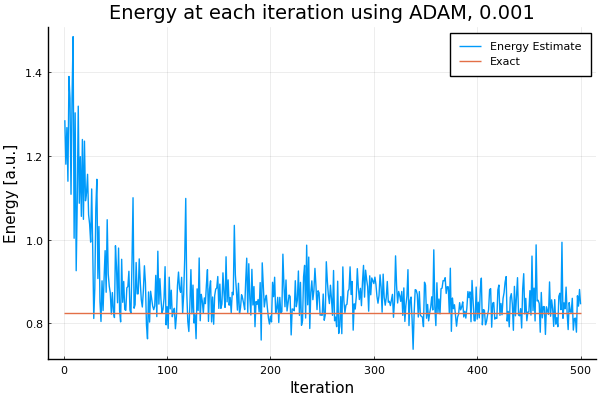

In [21]:
lr = 0.001
optimizer = ADAM(wf, lr = lr, max_iter = 1, tol = 1e-6);
e_i = opt_test(optimizer)
plt.plot(e_i, title="Energy at each iteration using ADAM, $(lr)", xlabel="Iteration", ylabel="Energy [a.u.]", label="Energy Estimate")
plt.plot!([0, length(e_i)], [0.8247, 0.8247], label="Exact")

E = 0.826431 iter = 1/1                                      

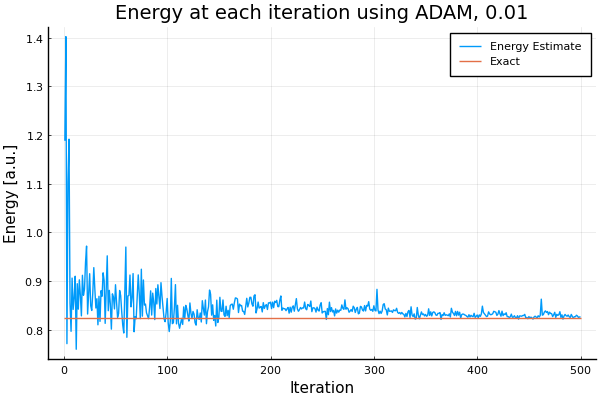

In [22]:
lr = 0.01
optimizer = ADAM(wf, lr = lr, max_iter = 1, tol = 1e-6);
e_i = opt_test(optimizer)
plt.plot(e_i, title="Energy at each iteration using ADAM, $(lr)", xlabel="Iteration", ylabel="Energy [a.u.]", label="Energy Estimate")
plt.plot!([0, length(e_i)], [0.8247, 0.8247], label="Exact")

E = 0.848658 iter = 1/1                                      

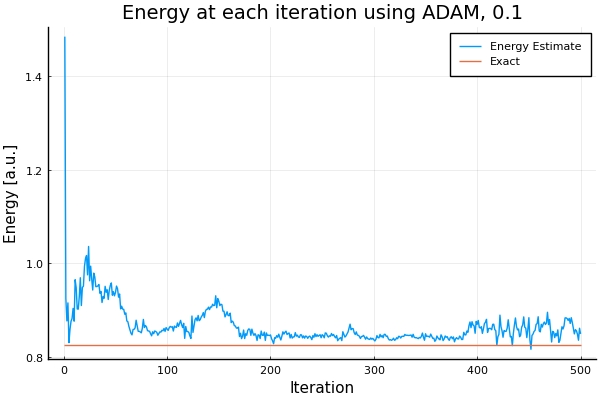

In [23]:
lr = 0.1
optimizer = ADAM(wf, lr = lr, max_iter = 1, tol = 1e-6);
e_i = opt_test(optimizer)
plt.plot(e_i, title="Energy at each iteration using ADAM, $(lr)", xlabel="Iteration", ylabel="Energy [a.u.]", label="Energy Estimate")
plt.plot!([0, length(e_i)], [0.8247, 0.8247], label="Exact")

E = 0.844963 iter = 1/1                                      

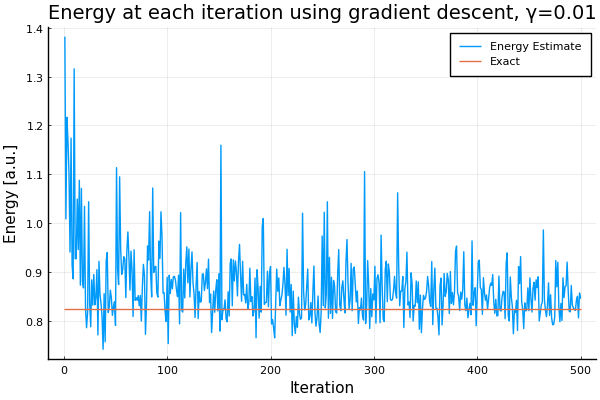

In [24]:
lr = 0.01
optimizer = GradientDescent(lr = lr, max_iter = 1, tol = 1e-6);
e_i = opt_test(optimizer)
plt.plot(e_i, title="Energy at each iteration using gradient descent, γ=$(lr)", xlabel="Iteration", ylabel="Energy [a.u.]", label="Energy Estimate")
plt.plot!([0, length(e_i)], [0.8247, 0.8247], label="Exact")